<a href="https://colab.research.google.com/github/EmaanBashir/PCR-AND-RFS-PREDICTION-ON-BREAST-CANCER-DATASET/blob/main/FSRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
def data_cleaning_for_regression(df):

    # dropping PCR  for Classification

    df = df.drop('pCR (outcome)',axis=1)

    # Replacing missing values

    df=df.replace(999, np.nan)
    imputer = SimpleImputer(strategy='median')

    df_imputed=imputer.fit_transform(df)

    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

    # Dealing with Categorical variables

    #  Age,ChemoGrade,Proliferation and TumorStage are ordinal categorical variables so we do not change them

    # ER, PGR, HER2, TrippleNegative, HistologyType and LNStatus are either binary or categorical variables with 2 different
    # values. We just convert HistologyType to binary format.

    df_imputed['HistologyType'] = df_imputed['HistologyType'].map({1: 0, 2: 1})

    return df_imputed

In [ ]:
# Reading the Data and dropping 'ID'
df=pd.read_excel('TrainDataset2023.xls')
df=df.drop('ID',axis=1)

df_regression =  data_cleaning_for_regression(df)
print(df_regression.columns.tolist())

y = df_regression['RelapseFreeSurvival (outcome)']
X = df_regression.drop('RelapseFreeSurvival (outcome)', axis=1)

['RelapseFreeSurvival (outcome)', 'Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', '

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth = 5, min_samples_split = 2, n_estimators = 100, criterion = 'absolute_error', random_state=0)  # Adjust parameters as needed
rf_model.fit(X, y)


RandomForestRegressor(criterion='absolute_error', max_depth=5, random_state=0)

In [ ]:
#Get feature importances
importances = rf_model.feature_importances_

In [ ]:
# Convert to a pandas series for better visualization and sorting
import pandas as pd
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

In [ ]:
# Selecting the top 10 features
top_features = feature_importances.head(50).index.tolist()
print(top_features)

['original_firstorder_Range', 'original_glszm_ZoneEntropy', 'original_shape_Elongation', 'Age', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SizeZoneNonUniformity', 'original_firstorder_Kurtosis', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_shape_Flatness', 'original_glszm_GrayLevelNonUniformity', 'original_firstorder_Variance', 'original_shape_LeastAxisLength', 'original_shape_SurfaceVolumeRatio', 'original_glszm_ZonePercentage', 'original_firstorder_10Percentile', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_firstorder_Skewness', 'original_firstorder_90Percentile', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_gldm_DependenceVariance', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_shape_Sphericity', 'original_firstorder_RobustMeanAbsoluteDeviatio

In [ ]:
# Or using a threshold
threshold = 0.0065 # example threshold
selected_features = feature_importances[feature_importances > threshold].index.tolist()
print(selected_features)
len(selected_features)

['original_firstorder_Range', 'original_glszm_ZoneEntropy', 'original_shape_Elongation', 'Age', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SizeZoneNonUniformity', 'original_firstorder_Kurtosis', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_shape_Flatness', 'original_glszm_GrayLevelNonUniformity', 'original_firstorder_Variance', 'original_shape_LeastAxisLength', 'original_shape_SurfaceVolumeRatio', 'original_glszm_ZonePercentage', 'original_firstorder_10Percentile', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_firstorder_Skewness', 'original_firstorder_90Percentile', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_gldm_DependenceVariance', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_shape_Sphericity', 'original_firstorder_RobustMeanAbsoluteDeviatio

58

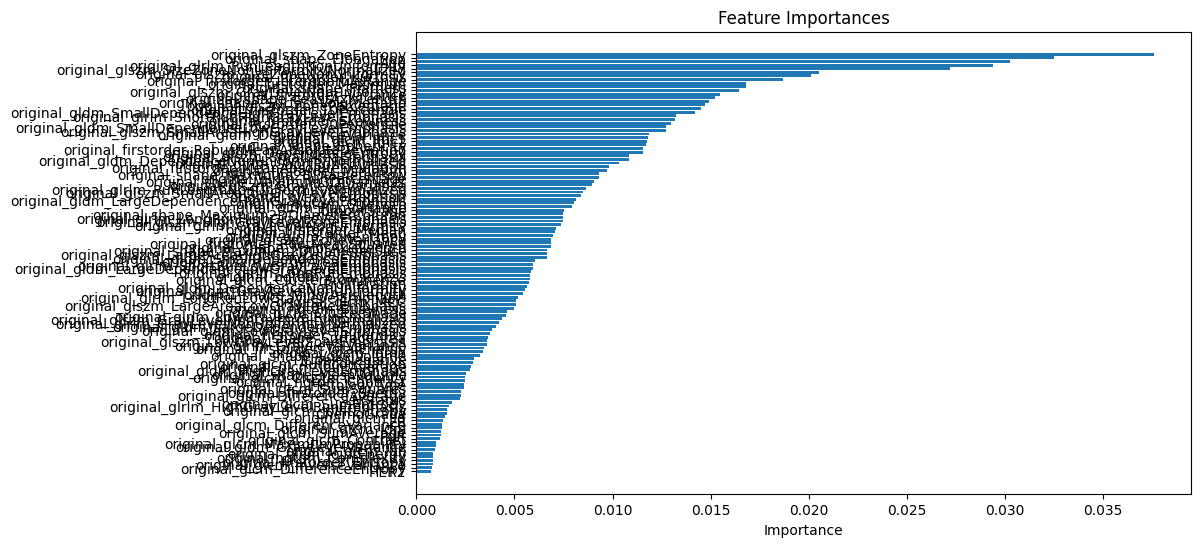

In [ ]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[1:], sorted_importances[1:])  # Plotting top 10 features
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.01,
            max_depth = 5, alpha = 5, n_estimators = 200, random_state = 0)
xgb_model.fit(X, y)
#Get feature importances
importances = xgb_model.feature_importances_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:50:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
# Selecting the top 10 features
top_features = feature_importances.head(50).index.tolist()
print(top_features)

['original_firstorder_Range', 'original_glszm_ZoneEntropy', 'original_shape_Elongation', 'Age', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SizeZoneNonUniformity', 'original_firstorder_Kurtosis', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_shape_Flatness', 'original_glszm_GrayLevelNonUniformity', 'original_firstorder_Variance', 'original_shape_LeastAxisLength', 'original_shape_SurfaceVolumeRatio', 'original_glszm_ZonePercentage', 'original_firstorder_10Percentile', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_firstorder_Skewness', 'original_firstorder_90Percentile', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_gldm_DependenceVariance', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_shape_Sphericity', 'original_firstorder_RobustMeanAbsoluteDeviatio

In [ ]:
# Or using a threshold
threshold = 0.005 # example threshold
selected_features = feature_importances[feature_importances > threshold].index.tolist()
print(selected_features)
len(selected_features)

['original_firstorder_Range', 'original_glszm_ZoneEntropy', 'original_shape_Elongation', 'Age', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SizeZoneNonUniformity', 'original_firstorder_Kurtosis', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_shape_Flatness', 'original_glszm_GrayLevelNonUniformity', 'original_firstorder_Variance', 'original_shape_LeastAxisLength', 'original_shape_SurfaceVolumeRatio', 'original_glszm_ZonePercentage', 'original_firstorder_10Percentile', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_firstorder_Skewness', 'original_firstorder_90Percentile', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_gldm_DependenceVariance', 'original_glcm_Imc1', 'original_glcm_Imc2', 'original_shape_Sphericity', 'original_firstorder_RobustMeanAbsoluteDeviatio

71

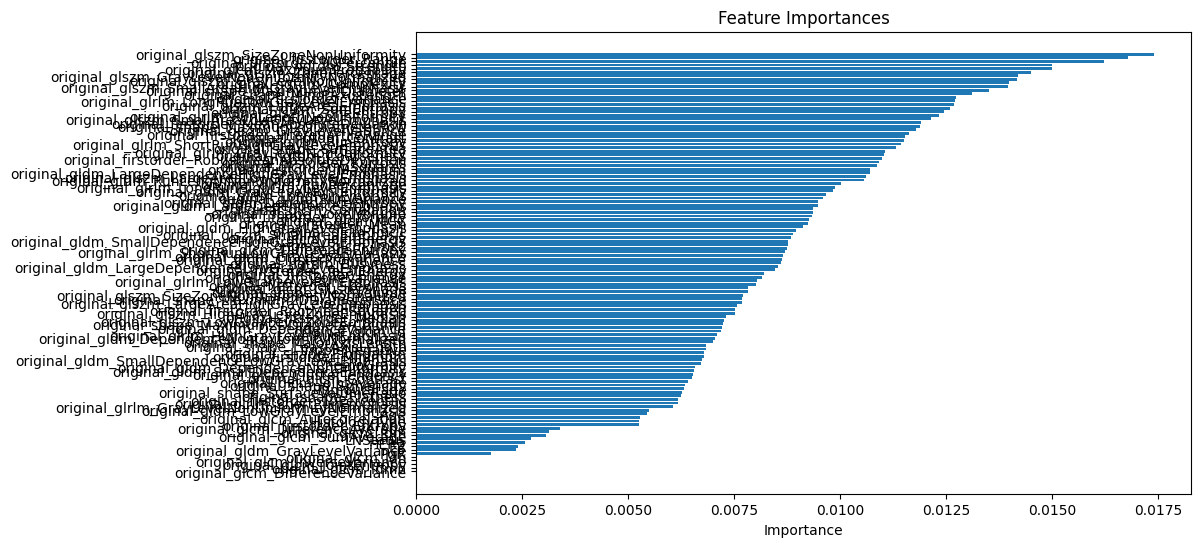

In [ ]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:], sorted_importances[:])  # Plotting top 10 features
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()